In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean

import seaborn as sns
import matplotlib.pylab as plt

import scipy.io
from scipy import signal

from IPython.display import Markdown, display
import sys
import os

In [2]:
# Paths del dataset
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

BASE_DIR = os.getcwd()

In [3]:
# Funciones

# from utils.funciones_tarea import hola
from utils.funciones_curso import multiple_plot
from utils.funciones_tarea import obtener_archivos_mat, crear_lista_markdown, crear_tabla_markdown, graficar_medida

In [4]:
DATA

WindowsPath('C:/Users/Usuario/Documents/UdeA/especializacion/repos/entrega-AA1/data')

In [5]:
# Ejemplo de uso
archivos_mat = obtener_archivos_mat(DATA)

In [6]:
ruta_muestra_mat = DATA / archivos_mat[0]  # Reemplaza con la ruta correcta
muestra_mat = scipy.io.loadmat(ruta_muestra_mat)
keys_mat_data = list(muestra_mat.keys())
column_names = keys_mat_data[3:]
display(Markdown("### Columnas del dataset"))
display(Markdown(crear_lista_markdown(column_names)))
display(Markdown("> **Columnas importantes**: emg, restimulus, rerepetition"))

### Columnas del dataset

- subject
- exercise
- stimulus
- emg
- glove
- restimulus
- repetition
- rerepetition


> **Columnas importantes**: emg, restimulus, rerepetition

In [7]:
df_emg = pd.DataFrame(muestra_mat['emg'])
print(df_emg.shape)
df_restimulus = pd.DataFrame(muestra_mat['restimulus'])
print(df_restimulus.shape)
df_repetition = pd.DataFrame(muestra_mat['rerepetition'])
print(df_repetition.shape)

(100778, 10)
(100778, 1)
(100778, 1)


In [8]:
## Carga de la base de datos
data_base = pd.DataFrame()

for i in range(len(archivos_mat)):
    ruta_archivo_mat = DATA / archivos_mat[i]
    archivo_mat = scipy.io.loadmat(ruta_archivo_mat)
    # Obtencion de las columnas de interes
    df_emg = pd.DataFrame(archivo_mat['emg'])
    df_emg.columns = ['emg_' + str(col + 1) for col in df_emg.columns]
    df_restimulus = pd.DataFrame(archivo_mat['restimulus'])
    df_restimulus.rename(columns={0: 'label'}, inplace= True)
    df_repetition = pd.DataFrame(archivo_mat['rerepetition'])
    df_repetition.rename(columns={0: 'repetition'},inplace= True)
    df_subject = pd.DataFrame({'s': [i + 1] * df_repetition.shape[0]}, dtype='int8')
    df_subject =  pd.concat([df_subject, df_emg, df_repetition, df_restimulus], axis=1)
    print(f"Muestras sujeto {i + 1}: {df_subject.shape[0]}")
    data_base = pd.concat([data_base, df_subject], ignore_index=True)

Muestras sujeto 1: 100778
Muestras sujeto 2: 100899
Muestras sujeto 3: 100920
Muestras sujeto 4: 100948
Muestras sujeto 5: 100785
Muestras sujeto 6: 101508
Muestras sujeto 7: 101191
Muestras sujeto 8: 101675
Muestras sujeto 9: 101323
Muestras sujeto 10: 101299
Muestras sujeto 11: 101014
Muestras sujeto 12: 101565
Muestras sujeto 13: 101732
Muestras sujeto 14: 101884
Muestras sujeto 15: 101221
Muestras sujeto 16: 101698
Muestras sujeto 17: 101549
Muestras sujeto 18: 101642
Muestras sujeto 19: 100948
Muestras sujeto 20: 100686
Muestras sujeto 21: 100720
Muestras sujeto 22: 100835
Muestras sujeto 23: 100894
Muestras sujeto 24: 101083
Muestras sujeto 25: 100817
Muestras sujeto 26: 100854
Muestras sujeto 27: 100925


## Informacion de la base de datos

In [9]:
data_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2731393 entries, 0 to 2731392
Data columns (total 13 columns):
 #   Column      Dtype  
---  ------      -----  
 0   s           int8   
 1   emg_1       float64
 2   emg_2       float64
 3   emg_3       float64
 4   emg_4       float64
 5   emg_5       float64
 6   emg_6       float64
 7   emg_7       float64
 8   emg_8       float64
 9   emg_9       float64
 10  emg_10      float64
 11  repetition  uint8  
 12  label       uint8  
dtypes: float64(10), int8(1), uint8(2)
memory usage: 216.2 MB


In [10]:
data_base.head(2)

,s,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10,repetition,label
0,1,0.0024,0.0024,0.0024,0.0024,0.0024,0.0098,0.0146,0.0488,0.0024,0.0317,0,0
1,1,0.0024,0.0024,0.0024,0.0024,0.0024,0.0098,0.0122,0.0439,0.0024,0.0317,0,0


In [11]:
df_s1 = data_base[data_base['s'] == 1]
df_s1.shape

(100778, 13)

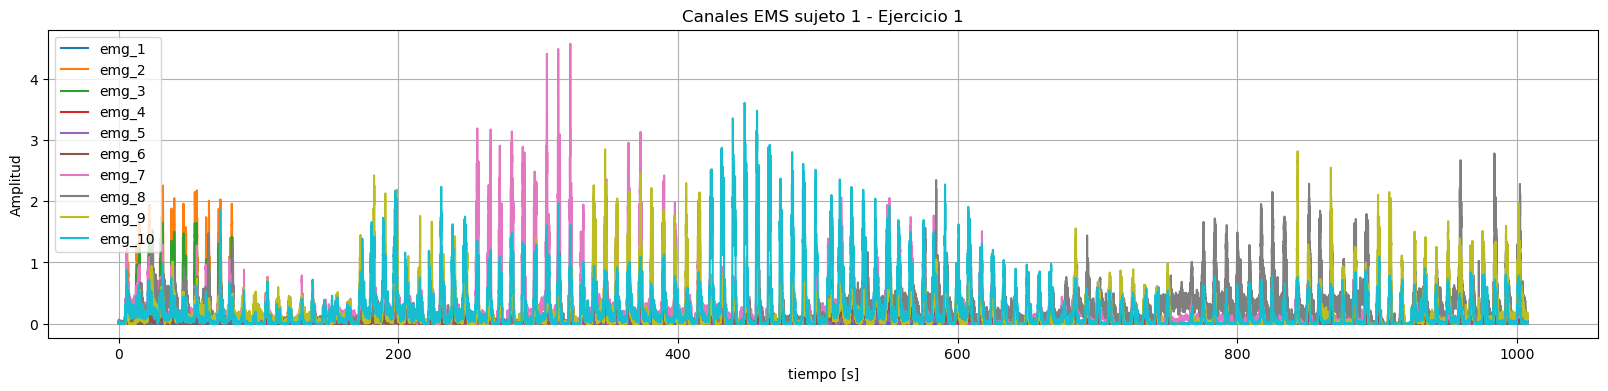

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


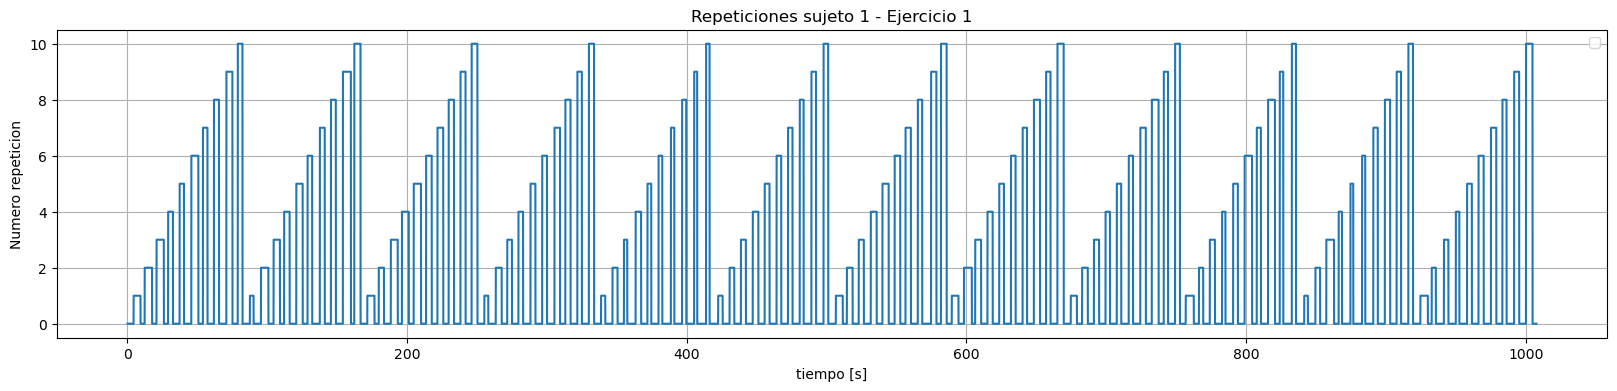

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


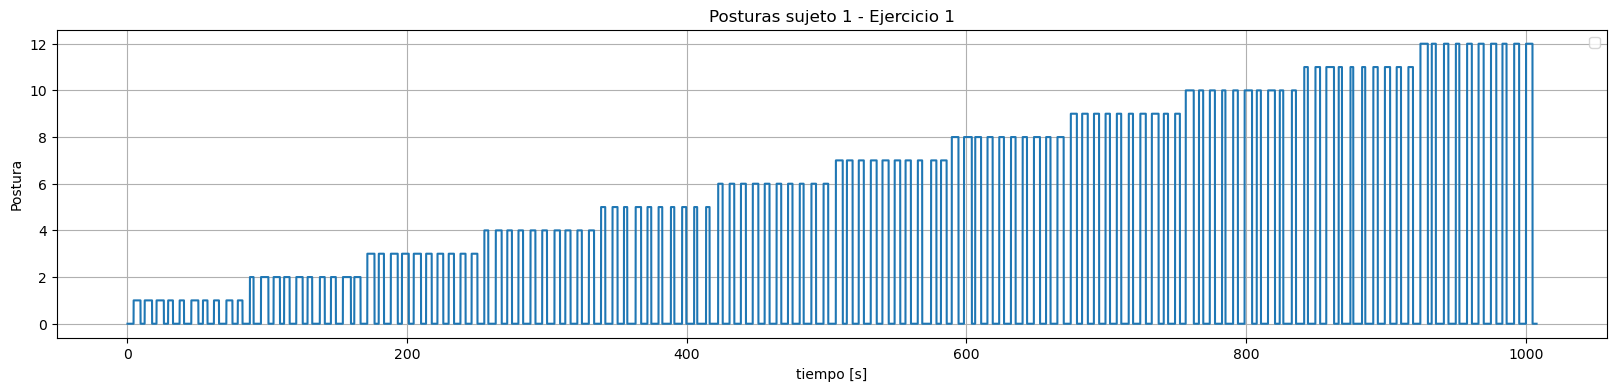

In [12]:
emg_s1 = df_s1[['emg_' + str(i) for i in range(1,11)]]
rep_s1 = df_s1['repetition']
labels_s1 = df_s1['label']
graficar_medida(emg_s1, fs = 100, titulo = "Canales EMS sujeto 1 - Ejercicio 1")
graficar_medida(rep_s1, fs = 100, titulo = "Repeticiones sujeto 1 - Ejercicio 1", etiqueta_y = "Numero repeticion")
graficar_medida(labels_s1, fs = 100, titulo = "Posturas sujeto 1 - Ejercicio 1", etiqueta_y = "Postura")

In [15]:
# Se guarda el dataframe completo
scipy.io.savemat('raw_data_base.mat', data_base)

## Ejemplos

* https://github.com/cancui/EMG-Signal-Processing-Library
* https://biosppy.readthedocs.io/en/stable/index.html